<!--BOOK_INFORMATION-->
<img align="left" style="width:80px;height:98px;padding-right:20px;" src="https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/pytorch-book-cover.jpg">

This notebook contains an excerpt from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-papa/pytorch-book/blob/main/01_Getting_Started.ipynb)

# Chapter 1 - An Introduction to PyTorch

## Verifying Your PyTorch Setup

In [9]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.1.0+cu118
False


## A Fun Example

In [11]:
import urllib.request
url = 'https://www.realsimple.com/thmb/ANnG5C8ke-rTDiCIKGd8be2b2rU=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/caffeine-in-coffee-GettyImages-553200091-bf760eea73134d749177b265e5d70bcb.jpg'
fpath = 'coffee.jpg'
urllib.request.urlretrieve(url, fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x1a42062d690>)

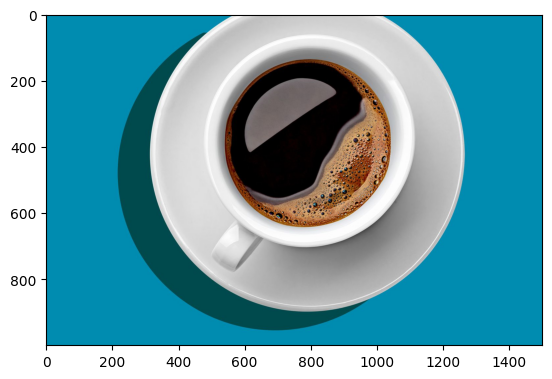

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('coffee.jpg')
plt.imshow(img)

In [34]:
from torchvision import transforms
transformation = transforms.Compose([
    transforms.Resize(16),
    transforms.CenterCrop(8),
    transforms.ToTensor()
])
my_tensor = transformation(img)

In [35]:
my_tensor.size()

torch.Size([3, 8, 8])

In [31]:
import torch 
from torchvision import transforms

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)
# out: 
# <class 'torch.Tensor'> torch.Size([3, 224, 224])

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [49]:
batch = torch.unsqueeze(img_tensor, 0)
print(batch.shape)
# out: torch.Size([1, 3, 224, 224])

torch.Size([1, 3, 224, 224])


In [50]:
from torchvision import models

model = models.alexnet(pretrained=True)

In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# out(results will vary): cpu 

model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)
# out: torch.Size([1, 1000])

cpu
torch.Size([1, 1000])


In [58]:
y_max, index = torch.max(y,1)
print(index, y_max)
# out: tensor([967]) tensor([22.3059], grad_fn=<MaxBackward0>)

tensor([967]) tensor([16.9842], grad_fn=<MaxBackward0>)


In [59]:
import urllib.request
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

print(classes[967])
# out: 967: 'espresso',

967: 'espresso',


In [60]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())
#967: 'espresso', 87.85208892822266

967: 'espresso', 72.47666931152344


In [65]:
_, indices = torch.sort(y, descending=True)

for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())
# out:
# 967: 'espresso', 87.85208892822266
# 968: 'cup', 7.28359317779541
# 504: 'coffee mug', 4.33521032333374
# 925: 'consomme', 0.36686763167381287
# 960: 'chocolate sauce, chocolate syrup', 0.09037172049283981

967: 'espresso', 72.47666931152344
504: 'coffee mug', 9.979147911071777
666: 'mortar', 7.618955612182617
968: 'cup', 4.821170806884766
925: 'consomme', 1.0984554290771484


### Short Version

In [ ]:
import torch
from torchvision import transforms, models

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
batch = torch.unsqueeze(img_tensor, 0)
model = models.alexnet(pretrained=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
model.to(device)
y = model(batch.to(device))

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

967: 'espresso', 87.85211944580078
968: 'cup', 7.283581733703613
504: 'coffee mug', 4.335195541381836
925: 'consomme', 0.3668670356273651
960: 'chocolate sauce, chocolate syrup', 0.0903714969754219
